In [61]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

In [62]:
#Load data
df = pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape', index_col=0)
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [63]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [64]:
#Describe the data
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [65]:
#Rename the column
df.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"QuarterlyTax"},inplace=True)
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


<AxesSubplot:>

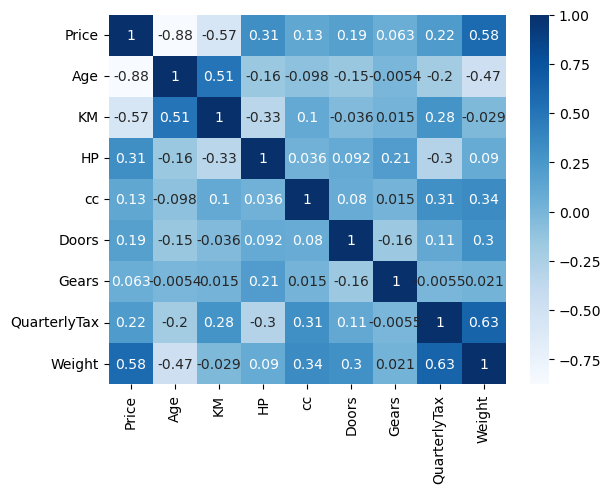

In [66]:
#Visulization- Heatmap correlation

sns.heatmap(df.corr(), cmap='Blues' ,annot=True)

In [67]:
data=df
# Separate the features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Random Forest for Feature Importance
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importance_scores = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top K features
k = 8 
selected_features = feature_importances['Feature'][:k]

# Display the selected features
print("Selected Features: ")
print(selected_features)

Selected Features: 
0             Age
1              KM
7          Weight
2              HP
6    QuarterlyTax
3              cc
4           Doors
5           Gears
Name: Feature, dtype: object


In [68]:
#We can drop cc, Gears and Doors

x = X.drop(columns=['Gears','cc','Doors'])
x

,Age,KM,HP,QuarterlyTax,Weight
Id,,,,,
1,23,46986,90,210,1165
2,23,72937,90,210,1165
3,24,41711,90,210,1165
4,26,48000,90,210,1165
5,30,38500,90,210,1170
...,...,...,...,...,...
1438,69,20544,86,69,1025
1439,72,19000,86,69,1015
1440,71,17016,86,69,1015


# Calculate VIF

For checking Multicollinearity

In [69]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Feature'] = x.columns
vif

,VIF,Feature
0,14.580326,Age
1,7.535903,KM
2,62.174735,HP
3,9.818554,QuarterlyTax
4,104.873403,Weight


As we can see from values the Weight having high VIF value, so we are dropping this

In [70]:
# Dropping weight
x = x.drop(columns=['Weight'])

In [71]:
#calculating VIF value after dropping weight
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Feature'] = x.columns
vif

,VIF,Feature
0,13.394684,Age
1,7.497530,KM
2,10.981617,HP
3,5.640533,QuarterlyTax


In [72]:
# Dropping Age
x = x.drop(columns=['Age'])

#calculating VIF value after dropping Age
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Feature'] = x.columns
vif

,VIF,Feature
0,4.268809,KM
1,5.084040,HP
2,5.265527,QuarterlyTax


In [73]:
def model(X, y):
    # Scale the features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Build the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error of the model
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the R2 score
    r2 = r2_score(y_test, y_pred)
   
    return mse, r2

In [74]:
print("Metrics for model only KM, QuarterlyTax and HP independent Columns:")
MSE1,R21=model(X,y)
print("Mean Squared Error:", MSE1)
print("R2 score:", R21)

Metrics for model only KM, QuarterlyTax and HP independent Columns:
Mean Squared Error: 1950244.9877904297
R2 score: 0.853835280567225


# Model validation technique

# 1. Residual Analysis

As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.

NORMALITY TEST

In [75]:
# Build the Linear Regression model
import statsmodels.formula.api as smf
multi=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=df).fit()

multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:57:02   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age           -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM              -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP              31.6809      2.818     11.241      0.000      26.152      37.209
cc              -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors           -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears          594.3199    197.055      3.016      0.003     207.771     980.869
QuarterlyTax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight          16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

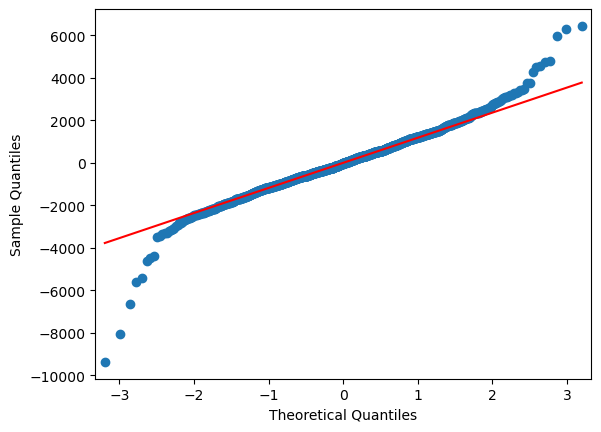

In [76]:
multi.resid
#Q-Q plot
sm.qqplot(multi.resid, line='q');

# 2.Residual plot of Homoscedasticity

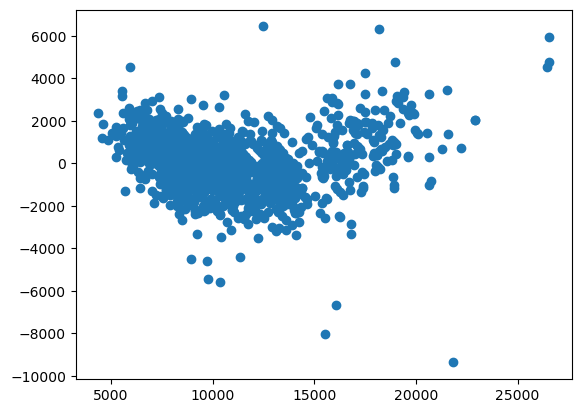

In [77]:
plt.scatter(multi.fittedvalues,multi.resid)

# Cook's distance

<StemContainer object of 3 artists>

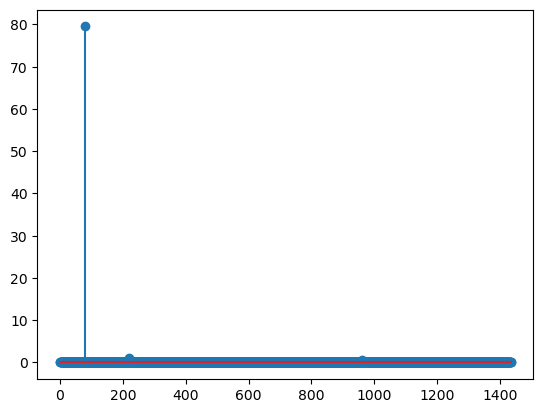

In [78]:
inf=multi.get_influence()
c,p = inf.cooks_distance

# Cook's distance plot
plt.stem(c)

In [79]:
#Here we can se there are lot of influential datapoints which need to be deleted
np.argmax(c),np.max(c)

(80, 79.52010624138978)

In [80]:
df.iloc[[80]]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
Id,,,,,,,,,
81,18950,25,20019,110,16000,5,5,100,1180


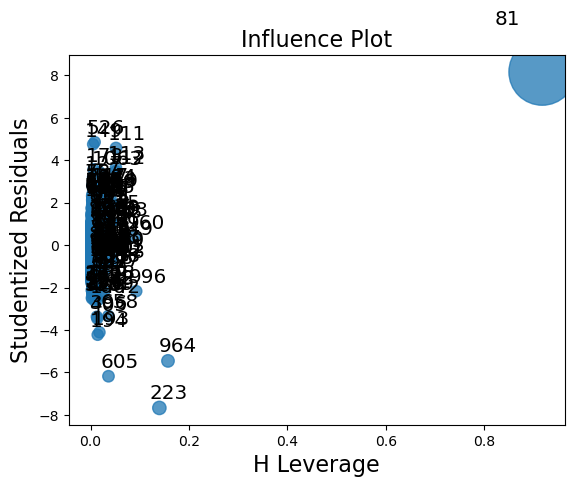

In [81]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(multi);